In [47]:
import pandas as pd #1
import numpy as np #2
import matplotlib.pyplot as plt #3
from matplotlib.ticker import StrMethodFormatter #4
import statsmodels.api as sm #5
from statsmodels.tsa.stattools import adfuller #6
from pandas.plotting import autocorrelation_plot #7
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #8
from statsmodels.tsa.arima_model import ARIMA #9

In [48]:
df=pd.read_csv("shetabkar1.csv", parse_dates=['REF_DATE'])
df = df.drop(columns=df.columns[0] , axis=1)
df = df.replace('Units' , 'Plus')
df

,REF_DATE,Company,Sales,VALUE
0,2000-01-01,Shetabkar,Plus,94001.0
1,2000-02-01,Shetabkar,Plus,98810.0
2,2000-03-01,Shetabkar,Plus,155496.0
3,2000-04-01,Shetabkar,Plus,147619.0
4,2000-05-01,Shetabkar,Plus,167225.0
...,...,...,...,...
271,2022-08-01,Shetabkar,Plus,136972.0
272,2022-09-01,Shetabkar,Plus,139531.0
273,2022-10-01,Shetabkar,Plus,132260.0
274,2022-11-01,Shetabkar,Plus,124585.0


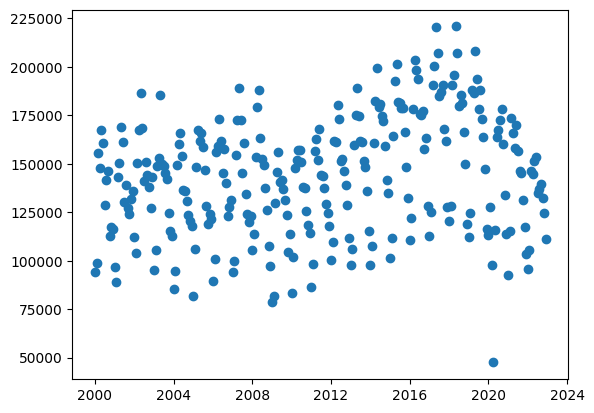

In [49]:
plt.scatter(data=df , x='REF_DATE' , y='VALUE')

In [50]:
df.to_excel('main_data.xlsx')

In [51]:
df.shape

(276, 4)

In [52]:
df.head()

,REF_DATE,Company,Sales,VALUE
0,2000-01-01,Shetabkar,Plus,94001.0
1,2000-02-01,Shetabkar,Plus,98810.0
2,2000-03-01,Shetabkar,Plus,155496.0
3,2000-04-01,Shetabkar,Plus,147619.0
4,2000-05-01,Shetabkar,Plus,167225.0


In [53]:
df.count()
df.dtypes

REF_DATE    datetime64[ns]
Company             object
Sales               object
VALUE              float64
dtype: object

In [54]:
df.describe()

,REF_DATE,VALUE
count,276,276.000000
mean,2011-06-16 20:20:52.173913088,143933.634058
min,2000-01-01 00:00:00,47508.000000
25%,2005-09-23 12:00:00,121801.750000
50%,2011-06-16 00:00:00,145445.500000
75%,2017-03-08 18:00:00,165738.250000
max,2022-12-01 00:00:00,220858.000000
std,NaN,30424.987292


<Axes: xlabel='REF_DATE'>

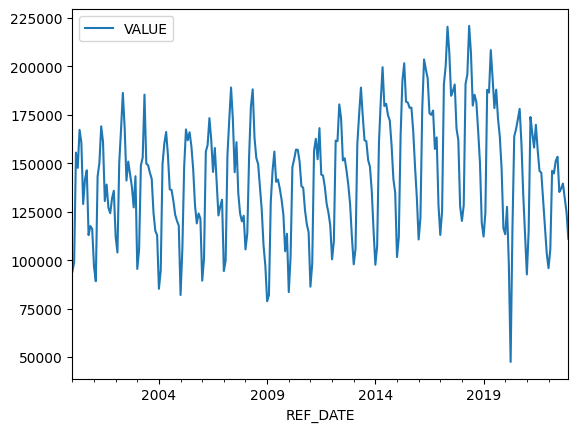

In [55]:
df.plot(x='REF_DATE')

In [56]:
# For determining if the time series is stationary or not:
#p-value > 0.05: Fail to reject the null hypothesis (H0), 
#the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), 
#the data does not have a unit root and is stationary.
x=df['VALUE'].squeeze()
X=x.values

In [57]:
X

array([ 94001.,  98810., 155496., 147619., 167225., 160649., 128960.,
       141733., 146361., 112936., 117609., 116162.,  96791.,  89159.,
       143189., 150179., 169058., 161079., 130499., 139030., 127045.,
       124217., 131917., 135801., 112105., 103981., 150286., 167558.,
       186313., 168305., 141101., 150865., 144297., 137951., 127244.,
       143312.,  95477., 105391., 148922., 152967., 185419., 149816.,
       148957., 145108., 141988., 124427., 115126., 112870.,  85238.,
        94777., 149605., 160195., 166136., 154134., 136563., 136187.,
       130699., 123552., 120287., 117822.,  82019., 106064., 148296.,
       167441., 161865., 166024., 158796., 146862., 128431., 118993.,
       124111., 121408.,  89422., 100740., 155990., 159436., 173291.,
       162029., 145521., 157868., 140065., 123076., 127732., 131157.,
        94413.,  99877., 154450., 172428., 189076., 172487., 145370.,
       160883., 134516., 124072., 120012., 122954., 105546., 113877.,
       153505., 1792

In [58]:
# Using  Augmented Dickey-Fuller test for unit root test.
result = adfuller(X) #1
print('ADF Statistic: %f' % result[0]) #2
print('p-value: %f' % result[1]) #3
print('Critical Values:') #4
for key, value in result[4].items(): #5
	print('\t%s: %.3f' % (key, value)) #6

ADF Statistic: -1.701272
p-value: 0.430457
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [85]:
df['Value First Difference'] = df['VALUE'] - df['VALUE'].shift(1) #1
df['Seasonal First Difference'] = df['VALUE'] - df['VALUE'].shift(96) #2
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(1)
df.to_excel('time_series_data.xlsx')

,REF_DATE,VALUE,Value First Difference,Seasonal First Difference,Seasonal Second Difference
0,2000-01-01,94001.0,NaN,NaN,NaN
1,2000-02-01,98810.0,4809.0,NaN,NaN
2,2000-03-01,155496.0,56686.0,NaN,NaN
3,2000-04-01,147619.0,-7877.0,NaN,NaN
4,2000-05-01,167225.0,19606.0,NaN,NaN
...,...,...,...,...,...
95,2007-12-01,122954.0,2942.0,NaN,NaN
96,2008-01-01,105546.0,-17408.0,11545.0,NaN
97,2008-02-01,113877.0,8331.0,15067.0,3522.0
98,2008-03-01,153505.0,39628.0,-1991.0,-17058.0


<Axes: xlabel='REF_DATE'>

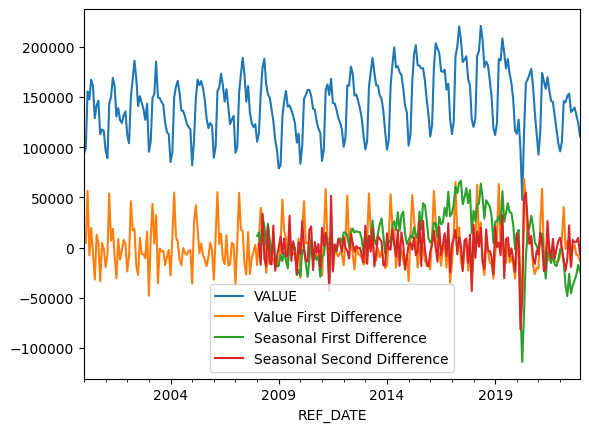

In [61]:
df.plot(x='REF_DATE')

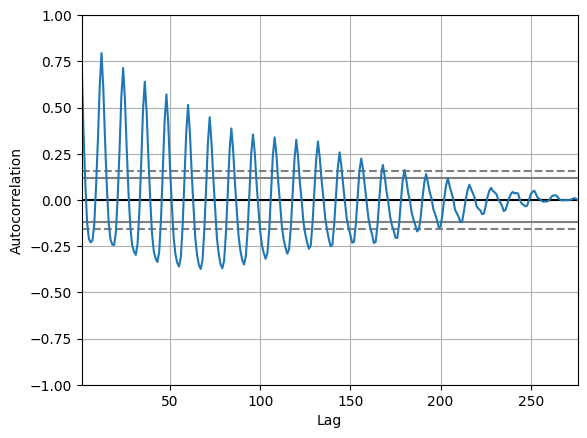

In [62]:
#Auto Regressive Model which predicts future behavior based on past behavior.
#It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.
autocorrelation_plot(df['VALUE'])
plt.show()

c:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


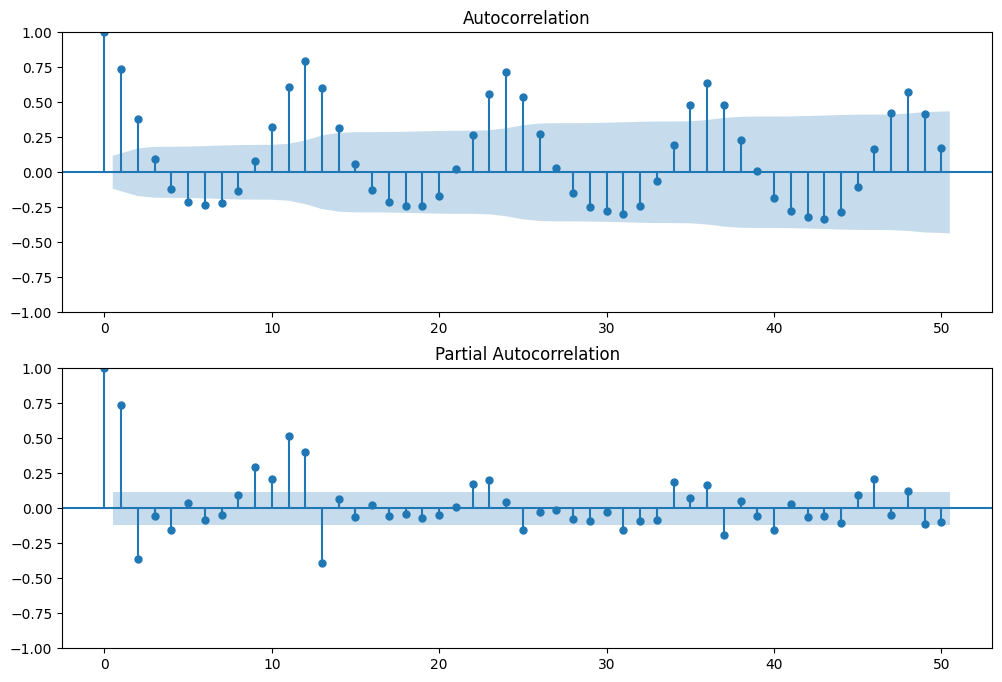

In [63]:
fig = plt.figure(figsize=(12,8)) #1
ax1 = fig.add_subplot(211) #2
fig = plot_acf(df['VALUE'],lags=50,ax=ax1) #3
ax2 = fig.add_subplot(212) #4
fig = plot_pacf(df['VALUE'],lags=50,ax=ax2) #5

In [64]:
timeseries_2 = df['VALUE'] - df['VALUE'].mean()

In [65]:
# We performed the seasonality analysis in order to find out the prominent frequencies (periodicity) 
#in the frequency domain using the Fourier Transform for full-time series and the alternating 
#component of the series.
#Energy Spectral Density (ESD) plot
def get_esd(ts: pd.core.series.Series, fs: float) -> tuple:

    T = 1 / fs
    N = len(ts)
    F = 1 / (N * T)
    b = (np.abs(T * np.fft.fft(ts))) ** 2
    c = b[0:N//2+1]
    esd = c * 2
    f = np.array(range(int(N/2+1)))
    f = f * F
    return (esd, f) 

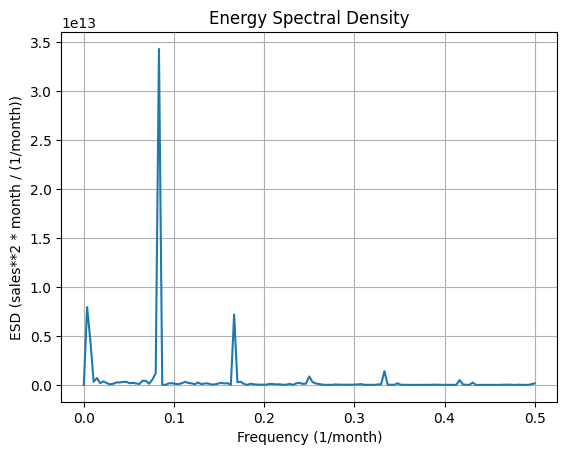

In [66]:
esd_2, f = get_esd(timeseries_2, 1.0)
plt.figure(3)
plt.plot(f, esd_2)
plt.title('Energy Spectral Density')
plt.xlabel('Frequency (1/month)')
plt.ylabel('ESD (sales**2 * month / (1/month))')
plt.grid()

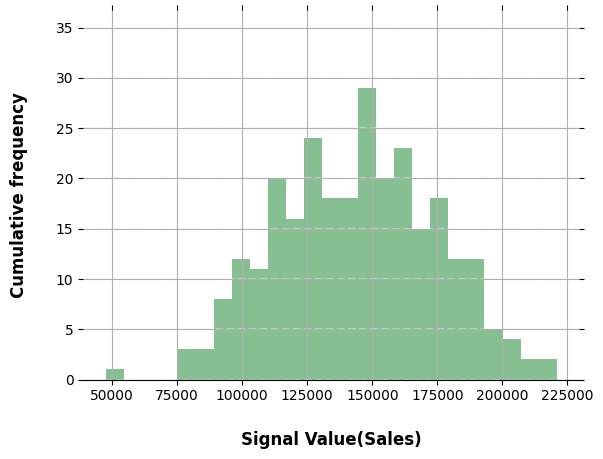

In [67]:
# Statistical analysis for understanding the probabilty distribution of the data
ax= pd.DataFrame.hist(df,column='VALUE', bins=25,color='#86bf91')
ax = ax[0]
for x in ax:

    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    
    x.set_title("")

    
    x.set_xlabel("Signal Value(Sales)", labelpad=20, weight='bold', size=12)

    
    x.set_ylabel("Cumulative frequency", labelpad=20, weight='bold', size=12)

    
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

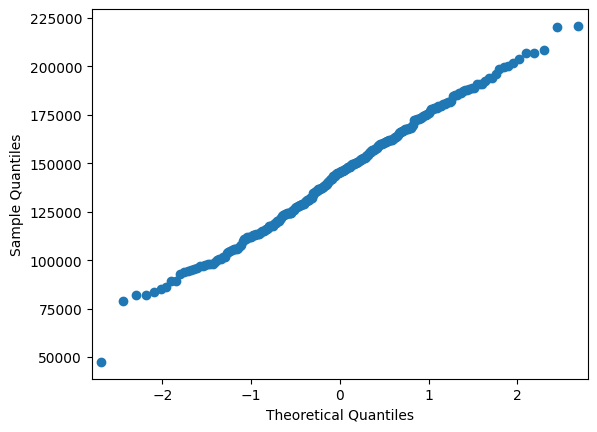

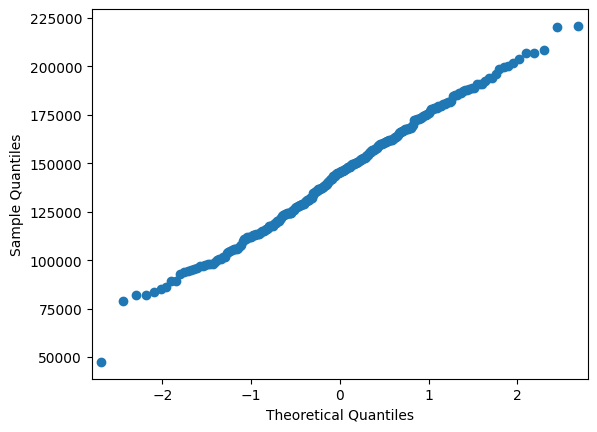

In [68]:
# QQplot provides a summary of whether the distributions of two variables are 
#similar or not with respect to the locations
sm.qqplot(df['VALUE'])

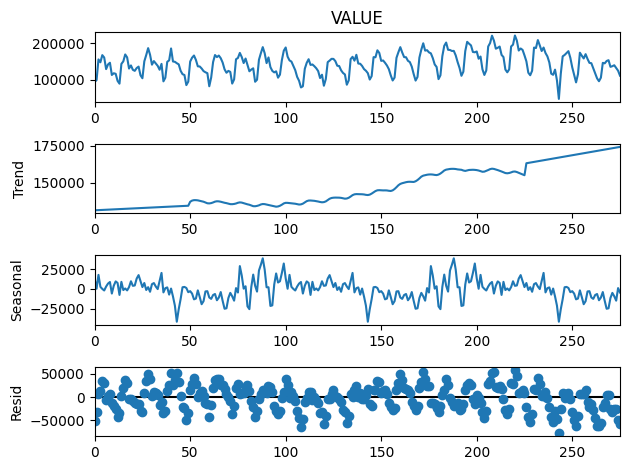

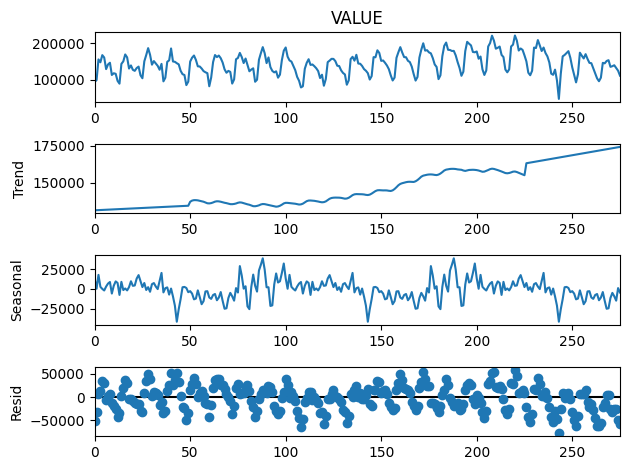

In [69]:
# Decomposing the values as seasonal,trend and noise
from statsmodels.tsa.seasonal import seasonal_decompose
df.sort_index(inplace= True)
result = seasonal_decompose(df['VALUE'], model='additive',extrapolate_trend='freq', period=100)
result.plot()

In [70]:
timeseries= df['VALUE']
timeseries_diff_1 = timeseries.diff().dropna() #1
timeseries_diff_2 = timeseries_diff_1.dropna() #2
p_value = adfuller(timeseries)[1].round(4) #3
print('Original Series: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")
p_value = adfuller(timeseries_diff_1)[1].round(4)
print('1st Order Differencing: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")
p_value = adfuller(timeseries_diff_2)[1].round(4)
print('2st Order Differencing: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")

Original Series: p_value = 0.4305
Data are NOT-STATIONARY 

1st Order Differencing: p_value = 0.0
Data are STATIONARY 

2st Order Differencing: p_value = 0.0
Data are STATIONARY 



In [71]:
def train_test_split(ts: pd.core.series.Series, test_size: int) -> tuple:
    train_size = len(ts) - test_size
    return (ts[:train_size], ts[train_size:])
 
TEST_PERIOD=15
train, test = train_test_split(ts=df['VALUE'], test_size=TEST_PERIOD*12)

model = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 0),
                                seasonal_order=(5, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary())

c:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                VALUE   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(5, 0, [1], 12)   Log Likelihood                -383.431
Date:                              Fri, 16 Jun 2023   AIC                            782.862
Time:                                      14:38:35   BIC                            795.305
Sample:                                           0   HQIC                           787.157
                                               - 96                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0123      2.316     -0.005      0.996      -4.552       4.528
ar.S.L12       0.45

In [72]:
df=df.drop(df.columns.difference(['REF_DATE','VALUE']),axis=1)
df=df.reset_index(drop=True)

In [73]:
forecast_months = 12 
fcast = results.predict(len(df['REF_DATE']),len(df['REF_DATE'])+forecast_months,
                                dynamic = True)

c:\Users\welcome\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [74]:
from pandas.tseries.offsets import DateOffset
future_dates=[df['REF_DATE'][df.index[-1]] + DateOffset(months=x)for x in range(0,13)]

In [75]:
future_datest_df=pd.DataFrame(future_dates,columns=['REF_DATE'],index=pd.RangeIndex(start=276, stop=289))
future_datest_df


,REF_DATE
276,2022-12-01
277,2023-01-01
278,2023-02-01
279,2023-03-01
280,2023-04-01
281,2023-05-01
282,2023-06-01
283,2023-07-01
284,2023-08-01
285,2023-09-01


In [76]:
future_datest_df['fcast']=fcast
future_datest_df

,REF_DATE,fcast
276,2022-12-01,107444.353347
277,2023-01-01,119841.375110
278,2023-02-01,182001.382303
279,2023-03-01,197418.684604
280,2023-04-01,211911.437773
281,2023-05-01,196767.026940
282,2023-06-01,174390.160879
283,2023-07-01,183190.764872
284,2023-08-01,160495.612663
285,2023-09-01,146414.825620


In [77]:
future_df=pd.concat([df,future_datest_df])
future_df.tail(20)

,REF_DATE,VALUE,fcast
269,2022-06-01,153361.0,NaN
270,2022-07-01,135177.0,NaN
271,2022-08-01,136972.0,NaN
272,2022-09-01,139531.0,NaN
273,2022-10-01,132260.0,NaN
274,2022-11-01,124585.0,NaN
275,2022-12-01,111049.0,NaN
276,2022-12-01,NaN,107444.353347
277,2023-01-01,NaN,119841.375110
278,2023-02-01,NaN,182001.382303


<Axes: xlabel='REF_DATE'>

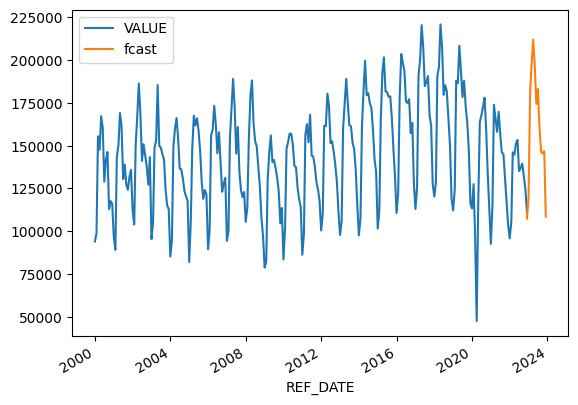

In [78]:
future_df.plot(x='REF_DATE')